In [1]:
#PCA 예제
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

In [2]:

# Eating, exercise habbit and their body shape
df = pd.DataFrame(columns=['calory', 'breakfast', 'lunch', 'dinner', 'exercise', 'body_shape'])

In [3]:
#각각 사람을 입력
df.loc[0] = [1200, 1, 0, 0, 2, 'Skinny']
df.loc[1] = [2800, 1, 1, 1, 1, 'Normal']
df.loc[2] = [3500, 2, 2, 1, 0, 'Fat']
df.loc[3] = [1400, 0, 1, 0, 3, 'Skinny']
df.loc[4] = [5000, 2, 2, 2, 0, 'Fat']
df.loc[5] = [1300, 0, 0, 1, 2, 'Skinny']
df.loc[6] = [3000, 1, 0, 1, 1, 'Normal']
df.loc[7] = [4000, 2, 2, 2, 0, 'Fat']
df.loc[8] = [2600, 0, 2, 0, 0, 'Normal']
df.loc[9] = [3000, 1, 2, 1, 1, 'Fat']

In [4]:
df.head(10)
# X변수는 칼로리 아침, 점심, 저녁, 운동인 다차원의 데이터이고
# Y값으로 체형이 나오게 된다.
# 이를 PCA를 이용해 주성분을 파악해보자

,calory,breakfast,lunch,dinner,exercise,body_shape
0,1200,1,0,0,2,Skinny
1,2800,1,1,1,1,Normal
2,3500,2,2,1,0,Fat
3,1400,0,1,0,3,Skinny
4,5000,2,2,2,0,Fat
5,1300,0,0,1,2,Skinny
6,3000,1,0,1,1,Normal
7,4000,2,2,2,0,Fat
8,2600,0,2,0,0,Normal
9,3000,1,2,1,1,Fat


In [5]:
X = df[['calory', 'breakfast', 'lunch', 'dinner', 'exercise']]
# Y is labels
Y = df[['body_shape']]

In [6]:
Y.head(10)

,body_shape
0,Skinny
1,Normal
2,Fat
3,Skinny
4,Fat
5,Skinny
6,Normal
7,Fat
8,Normal
9,Fat


In [7]:
x_std = StandardScaler().fit_transform(X)

In [8]:
x_std

array([[-1.35205803,  0.        , -1.3764944 , -1.28571429,  1.        ],
       [ 0.01711466,  0.        , -0.22941573,  0.14285714,  0.        ],
       [ 0.61612771,  1.29099445,  0.91766294,  0.14285714, -1.        ],
       [-1.18091145, -1.29099445, -0.22941573, -1.28571429,  2.        ],
       [ 1.89972711,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-1.26648474, -1.29099445, -1.3764944 ,  0.14285714,  1.        ],
       [ 0.18826125,  0.        , -1.3764944 ,  0.14285714,  0.        ],
       [ 1.04399418,  1.29099445,  0.91766294,  1.57142857, -1.        ],
       [-0.15403193, -1.29099445,  0.91766294, -1.28571429, -1.        ],
       [ 0.18826125,  0.        ,  0.91766294,  0.14285714,  0.        ]])

In [9]:
pca = decomposition.PCA(n_components=1)
sklearn_pca_x = pca.fit_transform(x_std)

C:\Users\qkrtm\Anaconda3\envs\jongsul\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


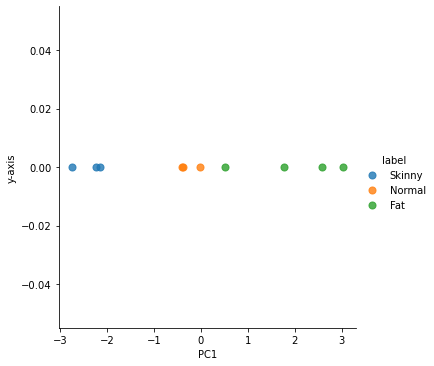

In [10]:
#분석결과
#분산을 최대로 하는 Z축을 찾고 이에 가장 적합한 축소 컬럼이'PC1'
#'PC1'이 전체 데이터 중 가장 많은 데이터를 설명가능함을 의미
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1'])
sklearn_result['y-axis'] = 0.0
sklearn_result['label'] = Y

sns.lmplot('PC1', 'y-axis', data=sklearn_result, fit_reg=False, 
          scatter_kws={"s":50}, hue='label');

In [ ]:
# 2차원으로 pca를 통해 차원을 축소한 결과 
#각각의 체형을 갖는 사람들의 분포를 시각적으로 확인가능하다.
#예를 들면 Fat이어도 normal에 가까운 fat이라는 시각적 확인 가능